# Lista 4 - uzupełnienie

In [1]:
import numpy as np, matplotlib.pyplot as plt

In [2]:
sigma = np.matrix([[1, 0.99], [0.99, 1]])
mu = np.matrix([0, 0]).reshape(2,1)
size = 1000

In [3]:
def choleski(A):
    L00 = np.sqrt(A.item(0,0))
    L10 = A.item(1,0)/L00
    L11 = np.sqrt(A.item(1,1) - L10**2)
    return np.matrix([[L00,0],[L10,L11]])

In [4]:
def normND(mu, sigma, size):
    Z = np.random.normal(loc = 0, scale = 1, size = len(mu)*size).reshape(len(mu), size)
    A = np.linalg.cholesky(sigma)
    X = np.array((mu+ np.dot(A,Z))).reshape(size,len(mu))
    return X

In [5]:
X_Y = normND(mu, sigma, size)

In [6]:
def ecdf(X, xy):
    F = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            F[i][j] = np.sum((X[:,0]<=xy[i][j][0]) & (X[:,1]<=xy[i][j][1]))/n
    return F

In [7]:
n = size
x = np.linspace(-5,5,n)
y = np.linspace(-5,5,n)
X, Y = np.meshgrid(x, y)
por = np.dstack((X, Y))

emp = ecdf(X_Y, por)

KeyboardInterrupt: 

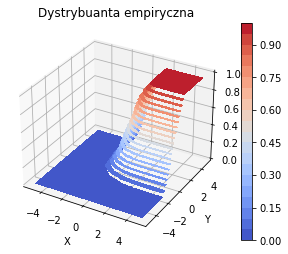

In [83]:
from scipy.stats import multivariate_normal
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.contourf(X, Y, emp, levels=20, cmap='coolwarm')
plt.title('Dystrybuanta empiryczna')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

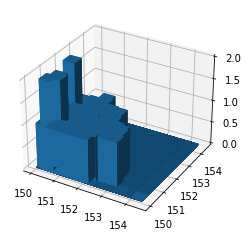

In [89]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x1, y1 = [X_Y[i][0] for i in range(n)], [X_Y[i][1] for i in range(n)]
hist, xedges, yedges = np.histogram2d(x1, y1, bins=200, range=[[0, 4], [0,4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 150, yedges[:-1] + 150, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

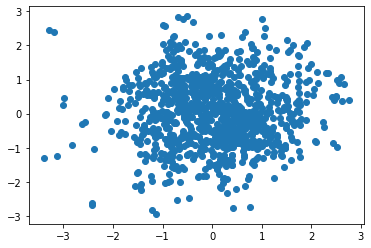

In [82]:
x, y = [X_Y[i][0] for i in range(n)], [X_Y[i][1] for i in range(n)]
plt.scatter(x,y)

In [96]:
sigma3 = np.array([[1,0.99,0.99],[0.99,1,0.99],[0.99,0.99,1]])
mu3 = np.zeros(3).reshape(3,1)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


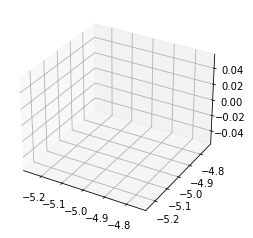

In [97]:
X3 = normND(mu3, sigma3, size)
# x3, y3, z3 = [X[i][0] for i in range(1000)], [X[i][1] for i in range(1000)], [X[i][2] for i in range(1000)]
x3 = X[:,0]
y3 = X[:,1]
z3 = X[:,2]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.scatter(x3,y3,z3)